In [1]:
import numpy as np
import pandas as pd
import pulp
import time
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#total script timing
tpt = time.process_time()
tt = time.clock()

### load data

In [3]:
dir="C:\\Users\\nlv16223\\OneDrive - Philips Lighting\\My Documents\\personal\\courses\\JADS\\assignments\\business analytics\\"
cities_file="FacilityLocationDistances.xlsx"


In [4]:
cities = pd.read_excel(dir+cities_file, sheetname=0, header=0, skiprows=2, index_col=1)

In [5]:
cities.head()

Unnamed: 0  Amsterdam  Antwerp  Athens  Barcelona  Berlin  \
Distance (km)                                                              
Amsterdam             NaN          0      160    3082       1639     649   
Antwerp               NaN        160        0    2766       1465     723   
Athens                NaN       3082     2766       0       3312    2552   
Barcelona             NaN       1639     1465    3312          0    1899   
Berlin                NaN        649      723    2552       1899       0   

               Bern  Brussels  Calais  Cologne   ...    Prague  Rome  \
Distance (km)                                    ...                   
Amsterdam       875       209     385      280   ...       973  1835   
Antwerp         704        46     211      237   ...       870  1660   
Athens         2627      3021    2976     2562   ...      2198  2551   
Barcelona       913      1419    1399     1539   ...      1679  1471   
Berlin          986       782     936      575   ...       354  1573   

               Rotterdam  Strasbourg  Stuttgart  The Hague  Turin  Venice  \
Distance (km)                                                               
Amsterdam             80         683        703         56   1264    1449   
Antwerp              100         544        659        139   1090    1275   
Athens              2826        2581       2428       3061   2250    1995   
Barcelona           1565        1072       1263       1589    892    1327   
Berlin               697         801        636        712   1172    1108   

               Vienna  Zurich  
Distance (km)                  
Amsterdam        1196     861  
Antwerp          1180     687  
Athens           1886    2449  
Barcelona        1989    1036  
Berlin            666     863  

[5 rows x 38 columns]

In [6]:
#remove 1st column ('unnamed', nan, xls read error?)
cities = cities.drop(cities.columns[0],1)

In [7]:
cities.head()

Amsterdam  Antwerp  Athens  Barcelona  Berlin  Bern  Brussels  \
Distance (km)                                                                  
Amsterdam              0      160    3082       1639     649   875       209   
Antwerp              160        0    2766       1465     723   704        46   
Athens              3082     2766       0       3312    2552  2627      3021   
Barcelona           1639     1465    3312          0    1899   913      1419   
Berlin               649      723    2552       1899       0   986       782   

               Calais  Cologne  Copenhagen   ...    Prague  Rome  Rotterdam  \
Distance (km)                                ...                              
Amsterdam         385      280         904   ...       973  1835         80   
Antwerp           211      237         861   ...       870  1660        100   
Athens           2976     2562        3414   ...      2198  2551       2826   
Barcelona        1399     1539        2230   ...      1679  1471       1565   
Berlin            936      575         743   ...       354  1573        697   

               Strasbourg  Stuttgart  The Hague  Turin  Venice  Vienna  Zurich  
Distance (km)                                                                   
Amsterdam             683        703         56   1264    1449    1196     861  
Antwerp               544        659        139   1090    1275    1180     687  
Athens               2581       2428       3061   2250    1995    1886    2449  
Barcelona            1072       1263       1589    892    1327    1989    1036  
Berlin                801        636        712   1172    1108     666     863  

[5 rows x 37 columns]

In [8]:
cities["Amsterdam"].head()

Distance (km)
Amsterdam       0
Antwerp       160
Athens       3082
Barcelona    1639
Berlin        649
Name: Amsterdam, dtype: int64

In [9]:
#row index names
cities.index

Index(['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich'],
      dtype='object', name='Distance (km)')

In [10]:
#column names
list(cities)[0:5]

['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin']

In [11]:
citynames=list(cities.index)
print(citynames)
len(citynames)

['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern', 'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt', 'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London', 'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich', 'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg', 'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich']


37

In [12]:
#first rows of first column
cities.iloc[0:5,0]

Distance (km)
Amsterdam       0
Antwerp       160
Athens       3082
Barcelona    1639
Berlin        649
Name: Amsterdam, dtype: int64

In [13]:
cities.shape

(37, 37)

### Build the model

In [14]:
# Instantiate our problem class
model = pulp.LpProblem("Facility location problem", pulp.LpMinimize)

In [15]:
model

Facility location problem:
MINIMIZE
None
VARIABLES

#### Variables

In [16]:
P = pulp.LpVariable.dicts("pallet shipments",(citynames,citynames),lowBound=0,cat='Continuous')

In [17]:
P

{'Amsterdam': {'Amsterdam': pallet_shipments_Amsterdam_Amsterdam,
  'Antwerp': pallet_shipments_Amsterdam_Antwerp,
  'Athens': pallet_shipments_Amsterdam_Athens,
  'Barcelona': pallet_shipments_Amsterdam_Barcelona,
  'Berlin': pallet_shipments_Amsterdam_Berlin,
  'Bern': pallet_shipments_Amsterdam_Bern,
  'Brussels': pallet_shipments_Amsterdam_Brussels,
  'Calais': pallet_shipments_Amsterdam_Calais,
  'Cologne': pallet_shipments_Amsterdam_Cologne,
  'Copenhagen': pallet_shipments_Amsterdam_Copenhagen,
  'Edinburgh': pallet_shipments_Amsterdam_Edinburgh,
  'Frankfurt': pallet_shipments_Amsterdam_Frankfurt,
  'Geneva': pallet_shipments_Amsterdam_Geneva,
  'Genoa': pallet_shipments_Amsterdam_Genoa,
  'Hamburg': pallet_shipments_Amsterdam_Hamburg,
  'Le Havre': pallet_shipments_Amsterdam_Le_Havre,
  'Lisbon': pallet_shipments_Amsterdam_Lisbon,
  'London': pallet_shipments_Amsterdam_London,
  'Luxembourg': pallet_shipments_Amsterdam_Luxembourg,
  'Lyon': pallet_shipments_Amsterdam_Lyon,
  '

In [18]:
#DC facility located at city?
A = pulp.LpVariable.dicts("DC located",(citynames),lowBound=0,cat='Binary')

In [19]:
A

{'Amsterdam': DC_located_Amsterdam,
 'Antwerp': DC_located_Antwerp,
 'Athens': DC_located_Athens,
 'Barcelona': DC_located_Barcelona,
 'Berlin': DC_located_Berlin,
 'Bern': DC_located_Bern,
 'Brussels': DC_located_Brussels,
 'Calais': DC_located_Calais,
 'Cologne': DC_located_Cologne,
 'Copenhagen': DC_located_Copenhagen,
 'Edinburgh': DC_located_Edinburgh,
 'Frankfurt': DC_located_Frankfurt,
 'Geneva': DC_located_Geneva,
 'Genoa': DC_located_Genoa,
 'Hamburg': DC_located_Hamburg,
 'Le Havre': DC_located_Le_Havre,
 'Lisbon': DC_located_Lisbon,
 'London': DC_located_London,
 'Luxembourg': DC_located_Luxembourg,
 'Lyon': DC_located_Lyon,
 'Madrid': DC_located_Madrid,
 'Marseille': DC_located_Marseille,
 'Milan': DC_located_Milan,
 'Munich': DC_located_Munich,
 'Naples': DC_located_Naples,
 'Nice': DC_located_Nice,
 'Paris': DC_located_Paris,
 'Prague': DC_located_Prague,
 'Rome': DC_located_Rome,
 'Rotterdam': DC_located_Rotterdam,
 'Strasbourg': DC_located_Strasbourg,
 'Stuttgart': DC_l

#### data

In [20]:
#transportation costs
C = cities

In [21]:
C.head()

Amsterdam  Antwerp  Athens  Barcelona  Berlin  Bern  Brussels  \
Distance (km)                                                                  
Amsterdam              0      160    3082       1639     649   875       209   
Antwerp              160        0    2766       1465     723   704        46   
Athens              3082     2766       0       3312    2552  2627      3021   
Barcelona           1639     1465    3312          0    1899   913      1419   
Berlin               649      723    2552       1899       0   986       782   

               Calais  Cologne  Copenhagen   ...    Prague  Rome  Rotterdam  \
Distance (km)                                ...                              
Amsterdam         385      280         904   ...       973  1835         80   
Antwerp           211      237         861   ...       870  1660        100   
Athens           2976     2562        3414   ...      2198  2551       2826   
Barcelona        1399     1539        2230   ...      1679  1471       1565   
Berlin            936      575         743   ...       354  1573        697   

               Strasbourg  Stuttgart  The Hague  Turin  Venice  Vienna  Zurich  
Distance (km)                                                                   
Amsterdam             683        703         56   1264    1449    1196     861  
Antwerp               544        659        139   1090    1275    1180     687  
Athens               2581       2428       3061   2250    1995    1886    2449  
Barcelona            1072       1263       1589    892    1327    1989    1036  
Berlin                801        636        712   1172    1108     666     863  

[5 rows x 37 columns]

In [22]:
#location costs
F = pd.Series(150000, index=citynames)

In [23]:
F.head()

Amsterdam    150000
Antwerp      150000
Athens       150000
Barcelona    150000
Berlin       150000
dtype: int64

In [24]:
#max shipments per DC
S=pd.Series(4000, index=citynames)

In [25]:
#demand per DA
D=pd.Series(100, index=citynames)

#### optimization objective function

In [26]:
model+=pulp.lpSum([P[i][j]*C[i][j] for i in citynames for j in citynames]) + \
            pulp.lpSum([A[i]*F[i] for i in citynames]), \
            "Total cost"

#### optimization constraints

In [27]:
#constraint max shipments per DC
# sum j (P(i,j)) <= S(i)          
for i in citynames:
    model += pulp.lpSum([P[i][j] for j in citynames]) <= S[i]

In [28]:
#constraint demand per DA
# sum i (P(i,j)) >= D(j)	        
for i in citynames:
    model += pulp.lpSum([P[j][i] for j in citynames]) >= D[i]    #note reversed index in P

In [29]:
#constraint no shipment if no location
#sum j (P(i,j) ) <= M*A(i)
M = np.max(S)*1000   #M large enough so that all shipments per DC are lower
for i in citynames:
    model += pulp.lpSum([P[i][j] for j in citynames]) <= M*A[i]    

In [30]:
#constraint shipment>=0
#is this needed if P has lowBound=0?? -> can be omitted (little speed gain)
#P(i,j) >=0

for i in citynames:
    for j in citynames:
        model += P[i][j]>=0    

In [31]:
model

Facility location problem:
MINIMIZE
150000*DC_located_Amsterdam + 150000*DC_located_Antwerp + 150000*DC_located_Athens + 150000*DC_located_Barcelona + 150000*DC_located_Berlin + 150000*DC_located_Bern + 150000*DC_located_Brussels + 150000*DC_located_Calais + 150000*DC_located_Cologne + 150000*DC_located_Copenhagen + 150000*DC_located_Edinburgh + 150000*DC_located_Frankfurt + 150000*DC_located_Geneva + 150000*DC_located_Genoa + 150000*DC_located_Hamburg + 150000*DC_located_Le_Havre + 150000*DC_located_Lisbon + 150000*DC_located_London + 150000*DC_located_Luxembourg + 150000*DC_located_Lyon + 150000*DC_located_Madrid + 150000*DC_located_Marseille + 150000*DC_located_Milan + 150000*DC_located_Munich + 150000*DC_located_Naples + 150000*DC_located_Nice + 150000*DC_located_Paris + 150000*DC_located_Prague + 150000*DC_located_Rome + 150000*DC_located_Rotterdam + 150000*DC_located_Strasbourg + 150000*DC_located_Stuttgart + 150000*DC_located_The_Hague + 150000*DC_located_Turin + 150000*DC_locat

### solve the model

In [32]:
#solve
tp = time.process_time()
t = time.clock()

model.solve()

elapsed_time_p = time.process_time() - tp
elapsed_time = time.clock() - t

print("solver status = %s\n" % pulp.LpStatus[model.status])
print("elapsed clock time: %.2f\n" % elapsed_time)
print("elapsed process time: %.2f\n" % elapsed_time_p)

solver status = Optimal

elapsed clock time: 30.34

elapsed process time: 0.20



#### optimization results

In [33]:
print("Total optimized cost = %.3f MEuro\n" % (model.objective.value()/1e6))


Total optimized cost = 2.010 MEuro



In [34]:
v=model.variables()

In [35]:
A_opt=v[0:37]
print("Total DCs opened = %d\n" % np.sum([A_opt[i].varValue for i in range(len(A))]))

Total DCs opened = 5



In [36]:
P_opt=v[37:]
P_opt = np.reshape(P_opt, (37, 37))
#P_opt[31][0].varValue

In [37]:
A_opt_v=[A_opt[n].varValue for n in range(37)]  #A_opt as list

In [38]:
#for n in range(37):
#    print("%s = %d" % (A_opt[n] , A_opt[n].varValue))

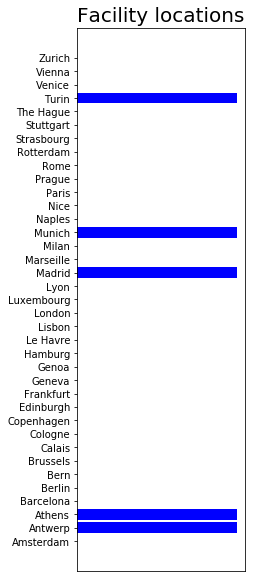

In [39]:
plt.figure(figsize=(3,10))
plt.barh(range(37), A_opt_v, color="blue",align="center")
plt.yticks(range(37),citynames,rotation=0)
plt.xticks(range(0))
plt.title('Facility locations',fontsize=20)
plt.show()

In [40]:
P_opt_v=np.zeros((37, 37))
for i in range(37):
    for j in range(37):
        P_opt_v[i][j]=P_opt[i][j].varValue  #P_opt as array

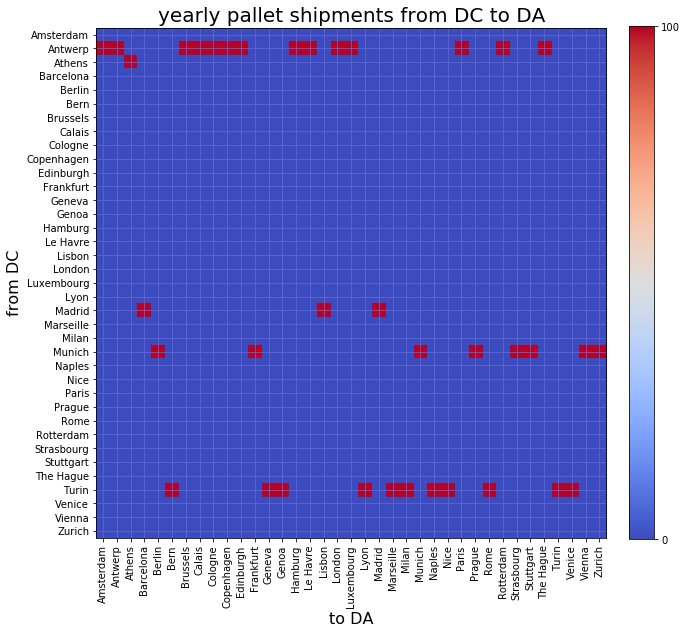

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
cax = ax.imshow(P_opt_v, interpolation='nearest', cmap=cm.coolwarm)
ax.set_title('yearly pallet shipments from DC to DA',fontsize=20)
cbar = fig.colorbar(cax, ticks=[0, 100],fraction=0.046, pad=0.04)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
plt.xticks(range(37),citynames,rotation=90)
plt.yticks(range(37),citynames)
plt.xlabel('to DA',fontsize=16)
plt.ylabel('from DC',fontsize=16)
plt.grid(b=True, which='both', color=(0.4,0.4,0.8),linestyle='-')
plt.savefig(dir+'shipments_fig.png', bbox_inches='tight')
plt.show()


In [42]:
#for i in range(37):
#    for j in range(37):
#        print("%s = %f" % (P_opt[i][j],P_opt[i][j].varValue))

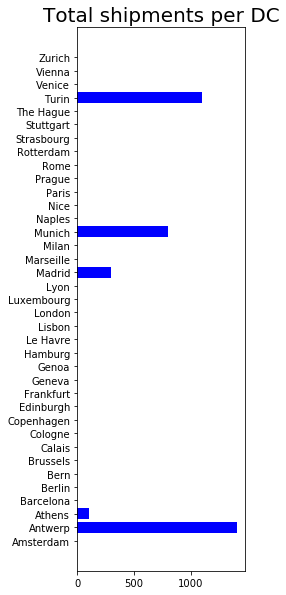

In [43]:
plt.figure(figsize=(3,10))
plt.barh(range(37), np.sum(P_opt_v,1), color="blue",align="center")
plt.yticks(range(37),citynames,rotation=0)
plt.title('Total shipments per DC',fontsize=20)
plt.savefig(dir+'shipments_DC_fig.png', bbox_inches='tight')
plt.show()

In [44]:
elapsed_time_p_tot = time.process_time() - tpt
elapsed_time_tot = time.clock() - tt

print("Total elapsed clock time: %.2f\n" % elapsed_time_tot)
print("Total elapsed process time: %.2f\n" % elapsed_time_p_tot)

Total elapsed clock time: 34.60

Total elapsed process time: 4.38

